In [1]:
import numpy as np
import qutip as qt
import datetime as dt
import matplotlib.pyplot as plt
import time
from tqdm import tqdm
from qutip.measurement import measure, measurement_statistics

In [2]:
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "serif"
})
plt.rcParams['figure.figsize'] = [5, 3]

# Three gates

In [3]:
#CNOT
one_projector = qt.basis(2,1)*(qt.basis(2,1).dag())
zero_projector = qt.basis(2,0)*(qt.basis(2,0).dag())
cnot = qt.tensor(zero_projector,qt.qeye(2)) + qt.tensor(one_projector,qt.sigmax())


# Two qubit hadamard
had = (1/(np.sqrt(2))*qt.Qobj([[1,1],[1,-1]]))
had_2 = qt.tensor(had, had)

#Two qubit Pauli_x
paulix_2 = qt.tensor(qt.sigmax(), qt.sigmax())

Dimensions of all three of them is 2 X 2 X 2 X 2

# State vector s

In [4]:
#State vector simulator using tensor product notation
#input: number of qubits
#output: Simulated state vector
def statevector_simulator_2(no_of_qubits):
    #size of hilbert space
    size = (2**no_of_qubits)

    # simulated only for even number of qubits
    # since CNOT gate is used
    if(no_of_qubits%2==0):
        #set initial state to be |00> in tensor notation
        ini = qt.tensor(qt.basis(2,0) , qt.basis(2,0))

        # Applying three gates sequentially 
        output_2 = cnot*had_2*paulix_2*ini
        out_temp = output_2
        output = output_2

        #fixing the number of iterations
        iterr = round((no_of_qubits-2)/2)

        #Starting the time counter
        start = time.time()

        #Loop to simulate state vector for higher qubits
        for i in range(iterr):
            output = qt.tensor(out_temp , output_2)
            out_temp = output
        end = time.time()

        #Time interval caluculated after end of loop
        intrval = end-start
        return output , intrval
    else:
        print("Invalid number of qubits")


#State vector simulator using only two dimensional matrices
def statevector_simulator_1(no_of_qubits):
    #size of hilbert space
    size = (2**no_of_qubits)
    if(no_of_qubits%2==0):
        #set initial state to be |00> in tensor notation
        ini = qt.basis(4 , 0)

        #Changing dimensions of gates to make them 2D matrices
        cnot.dims = [[4],[4]]
        had_2.dims = [[4],[4]]
        paulix_2.dims = [[4],[4]]

        # Applying three gates sequentially 
        output_2 = cnot*had_2*paulix_2*ini
        out_temp = output_2
        output = output_2

        #fixing the number of iterations for computing state vector
        iterr = round((no_of_qubits-2)/2)

        #Loop to simulate state vector for higher qubits
        start = time.time()
        for i in range(iterr):
            output = qt.tensor(out_temp , output_2)
            #Changing dimenions of output to make it a 1D vector
            dimen = 16*(4**i)
            output.dims = [[dimen],[1]]
            out_temp = output
        #Time interval caluculated after end of loop
        end = time.time()
        intrval = end-start
        return output , intrval
    else:
        print("Invalid number of qubits")


# State vector simulation using 2D matrix (Sub task -1)

In [5]:
# Time display
pbar = tqdm()
# Number of qubits
noq = 25

#List of time intervals 
time_int_l = []
i = 0
noq_l = []
while(i<noq):
    i = i + 2
    # Simulating the final state using 2D matrices
    a , time_int = statevector_simulator_1(i)
    # recording the time take for each iteration
    time_int_l.append(time_int)
    noq_l.append(i)
    pbar.update(1)
pbar.close()    

13it [00:00, 23.39it/s]


# State vector simulation using nD tensors (Subtask 2)

In [6]:
#CNOT
one_projector = qt.basis(2,1)*(qt.basis(2,1).dag())
zero_projector = qt.basis(2,0)*(qt.basis(2,0).dag())
cnot = qt.tensor(zero_projector,qt.qeye(2)) + qt.tensor(one_projector,qt.sigmax())

# Two qubit hadamard
had = (1/(np.sqrt(2))*qt.Qobj([[1,1],[1,-1]]))
had_2 = qt.tensor(had, had)

#Two qubit Pauli_x
paulix_2 = qt.tensor(qt.sigmax(), qt.sigmax())

In [7]:
# Time display
pbar = tqdm()
# Number of qubits
noq = 25

#List of time intervals 
time_int_l2 = []
i = 0
noq_l = []
while(i<noq):
    i = i + 2
    # Simulating the final state using nD tensor
    a , time_int = statevector_simulator_2(i)
    time_int_l2.append(time_int)
    noq_l.append(i)
    pbar.update(1)
pbar.close()    

13it [00:00, 23.22it/s]


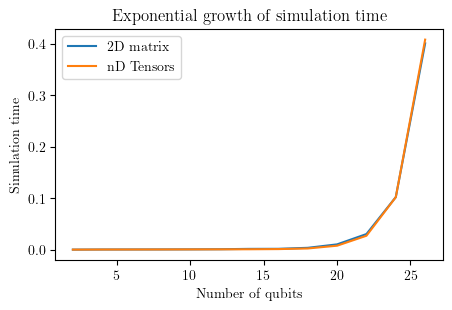

In [8]:
#rang = 8
rang = len(noq_l)
plt.plot(noq_l[0:rang], time_int_l[0:rang] , label = '2D matrix')
plt.plot(noq_l[0:rang], time_int_l2[0:rang] , label = 'nD Tensors')
plt.xlabel('Number of qubits')
plt.ylabel('Simulation time')
plt.title('Exponential growth of simulation time')
plt.legend()
plt.show()
#exponential scaling

### Zoom in of previous plot

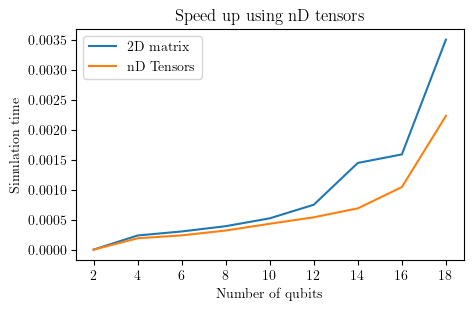

In [15]:
rang = 9
#rang = len(noq_l)
plt.plot(noq_l[0:rang], time_int_l[0:rang] , label = '2D matrix')
plt.plot(noq_l[0:rang], time_int_l2[0:rang] , label = 'nD Tensors')
plt.xlabel('Number of qubits')
plt.ylabel('Simulation time')
plt.title('Speed up using nD tensors')
plt.legend()
plt.show()


# Key takeaway

# Bonus Question

### Part-1)

In [10]:
# works for both tensor representation or 2d notation
def exp_value_experimental(state , operator , no_of_shots = 100):
    
    # list of eigenvalues of the operator 
    eig_list = operator.eigenenergies()

    # counter array to store occurence of each eigenvectore
    prob_list = np.zeros(len(eig_list))
    
    #loop for repeated measurement
    for i in tqdm(range(no_of_shots)):
        # post measurement state and its corresponding eigenvalue using qutip measure
        eig_val ,eig_vect =  measure(state, operator) 

        #counting occurence of each eigen value and updating the counter
        for i in range(len(eig_list)):
            if(round(eig_val , 3) == round(eig_list[i] , 3)):
                prob_list[i] = prob_list[i] + 1
                
    if (sum(prob_list) != 0):
        #converting counts to probabilities
        prob_list = (1/sum(prob_list))*prob_list
        
        #finding expectation values
        exp_val = 0
        for i in range(len(eig_list)):
            exp_val = exp_val + (eig_list[i]*prob_list[i])
        #returns both expectation values and probablity distribution
        return exp_val , prob_list
    else:
        print("Incorrect probabilities calculated")




### Part 2)

In [11]:
def exp_value_exact(state , operator):
    #using direct formula
    exp_value = np.real((state.dag())*operator*state)
    return np.real(exp_value)


# Example to test expectaion value

In [12]:
oper = qt.tensor(qt.sigmax() , qt.sigmay(),qt.sigmaz()\
                 ,qt.sigmax(),qt.sigmay(),qt.sigmaz())
state, interval = statevector_simulator_2(6)
val_10 , prob_list = exp_value_experimental(state , oper , 10)
val_30 , prob_list = exp_value_experimental(state , oper , 30)
val_50 , prob_list = exp_value_experimental(state , oper , 50)
val_200 , prob_list = exp_value_experimental(state , oper , 200)
val_act = exp_value_exact(state , oper)

error_list = []
val_list = [val_10 , val_30 , val_50 , val_200 ]
#val_list = [val_10 , val_100 ]
for val in val_list:
    error = abs(val_act - val)
    error_list.append(error)

100%|█████████████████████████████████████████| 200/200 [00:02<00:00, 86.02it/s]


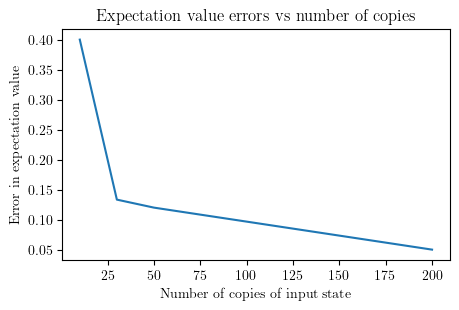

In [13]:
no_of_shots = [10 , 30 , 50 , 200]
plt.plot(no_of_shots, error_list)
plt.xlabel("Number of copies of input state")
plt.ylabel("Error in expectation value")
plt.title("Expectation value errors vs number of copies")
plt.show()